In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [8]:
# 读取文件
subway_df = pd.read_csv('./nyc-subway-weather.csv')

In [1]:
# 5个站点10天内的客流量
ridership = np.array([
    [0, 0, 2, 5, 0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [95, 229, 255, 496, 201],
    [2, 0, 1, 27, 0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [2]:
# 客流量最大的站点的平均值, 和所有数据的平均值
def mean_riders_for_max_station(ridership):

    max_station = ridership[0, :].argmax()
    overall_mean = ridership.mean()
    mean_for_max = ridership[:, max_station].mean()

    return overall_mean, mean_for_max

In [3]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

In [4]:
# 平均每站的最大和最小客流量
def min_and_max_riders_per_day(ridership):

    mean_daily_ridership = ridership.mean(axis=0)
    max_daily_ridership = mean_daily_ridership.max()
    min_daily_ridership = mean_daily_ridership.min()
    
    return max_daily_ridership, min_daily_ridership

In [5]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

In [6]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [7]:
ridership_df['R006'].mean()

3239.9

In [8]:
def mean_riders_for_max_station_df(ridership_df):
    max_station = ridership_df.iloc[0].argmax()
    overall_mean = ridership_df.values.mean()
    mean_for_max = ridership_df[max_station].mean()

    return overall_mean, mean_for_max

In [9]:
mean_riders_for_max_station_df(ridership_df)

(2342.5999999999999, 3239.9)

In [11]:
# Pearson's r
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

In [12]:
# Numpy现成的计算相关系数的函数
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.03564851577223041

In [13]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.5858954707662182

In [14]:
# 将dataframe中的成绩转换成等级，applymap函数练习
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [15]:
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

def convert_grades(grades):
    return grades.applymap(convert_grade)

In [16]:
print(convert_grades(grades_df))

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


In [17]:
# 找出每列数据框中的第二大值，apply函数练习
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [18]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]

def second_largest(df):
    # apply函数能将dataframe中的每列都转换成series
    return df.apply(second_largest_in_column)

In [19]:
print(second_largest(df))

a     4
b    40
c    20
dtype: int64


In [20]:
# 
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [21]:
(grades_df - grades_df.mean()) / grades_df.std()

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [22]:
grades_df.std(axis='columns')

Andre      13.435029
Barry      12.727922
Chris      15.556349
Dan        13.435029
Emilio     15.556349
Fred       13.435029
Greta       8.485281
Humbert    13.435029
Ivan       18.384776
James      19.091883
dtype: float64

In [23]:
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')

In [24]:
mean_diffs.div(grades_df.std(axis='columns'), axis='index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


In [6]:
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


Populating the interactive namespace from numpy and matplotlib


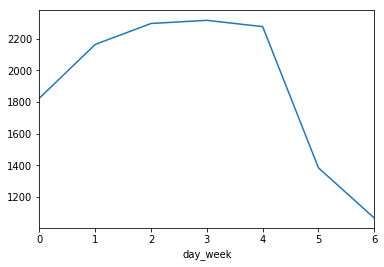

In [26]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
ridership_by_day.plot()

In [32]:
# 
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

def get_hourly_entries_and_exits(entries_and_exits):
    return ridership_df.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(hourly_for_group)

print(get_hourly_entries_and_exits(ridership_df))

   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


In [3]:
# 合并两个dataframe
volume_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [5]:
def combine_dfs(volume_df, weather_df):
    # 当join on使用的字段名不同，可以分别指定left on和right on的字段名称
    return volume_df.merge(weather_df,
                           on=['DATEn', 'hour', 'latitude', 'longitude'],
                           how='inner')

print(combine_dfs(volume_df, weather_df))

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564    0   
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135    0   
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135    0   
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135    0   
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135    0   
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.

In [11]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

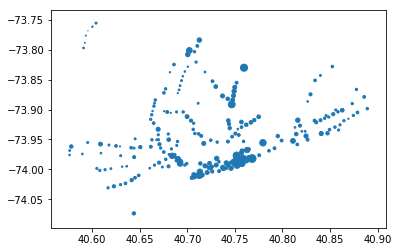

In [20]:
scaled_entries = data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std()
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
           s=scaled_entries * 10)